# Flaring spectrum
(Yuan et al. 2003)
![title](img/flaringspectrum.png)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.integrate as integrate
from scipy.integrate import quad
from scipy.special import kv, gamma

In [2]:
m_e=9.1*10**-28   # Electron mass [g]
e=5*10**-10       # Electron charge [esu]
k=1.4*10**-16     # Boltzmann constnat [erg/K]
c_light=3*10**10  # Speed of light [cm/s]
B_0=20               # Magnetic field [Gauss]
theta=np.pi/2     # Synchroton angle between velocity and field [rad]
hbar=10**-27      # Reduced planck constant [erg s]
sigma_t=6.65e-25  # Thomson cross section


log_omega_min=10
log_omega_max=22

log_gamma_min=1
log_gamma_max=6


# Power law electons

$$
 N(\gamma) d\gamma = N_0 \gamma^{-p} d\gamma, \space \gamma_{min} \leq \gamma \leq \gamma_c,
$$

$$
 N(\gamma) d\gamma = N_0 \gamma_c \gamma^{-p-1} d\gamma, \space \gamma_c \leq \gamma \leq \gamma_{max}.
$$
$p=1$, $\gamma_{max}=10^6$ and a cooling break at $\sim 10^{13}$Hz (Yuan 2003). Lastly only a portion of the thermal electrons get injected into a power law.

$$
N_{0,pl}=\eta N_{0,th},
$$
where $\eta=0.055$.

In [3]:
p=1
gamma_c=10**1

def N_powerlaw_electrons(gamma):
    if gamma<gamma_c:
        value = gamma**-p
    else:
        value= gamma_c*gamma**(-p-1)
    return(value)


norm,error=quad(N_powerlaw_electrons,10**log_gamma_min,10**log_gamma_max) # Normalization value, necessary because a cumulative propability distribution function goes to 1. 
                                                                          # The normalization factor is whatever value I have to devide the distribution by to get a PDF with a surface value of 1.

print('The normalization factor is {0:5.3e}'.format(norm))
def N_electron_PDF(gamma):
    return(N_powerlaw_electrons(gamma)/norm)

The normalization factor is 1.000e+00


In [4]:
def expectance_gamma(gamma_min,gamma_max):
    def integrand_1(gamma):
        value=gamma*N_electron_PDF(gamma)
        return(value)
    value,error=quad(integrand_1,gamma_min,gamma_max)
    return(value)

exp_gamma = expectance_gamma(10**log_gamma_min,10**log_gamma_max)
print('The expectation value of gamma is {0:5.3e}'.format(exp_gamma))


def numberdensity(B):
    value=B**2/(8*np.pi*exp_gamma*m_e*c_light**2)
    return(value)

eta=0.055
N_0=eta*numberdensity(B_0)
print('N_0 is {0:5.3e}, and carries units cm-3'.format(N_0))

The expectation value of gamma is 1.151e+02
N_0 is 9.283e+03, and carries units cm-3


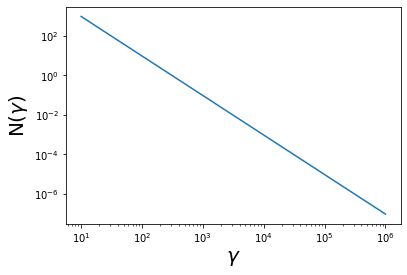

In [5]:
number = 100
N=np.zeros(number)
gamma = np.logspace(1,6,number)

for i in range(number):
    N[i]=N_0*N_electron_PDF(gamma[i])

plt.loglog(gamma,N)
plt.xlabel('$\gamma$',fontsize=20)
plt.ylabel('N($\gamma$)',fontsize=20)
plt.show()

# Synchroton Photons

In [6]:
def omega_c(gamma,B,theta):
    value=3/2*gamma**2*e*B/(m_e*c_light)*np.sin(theta)
    return(value)

def K_fivethird(x):
    value=kv(5/3,x)
    return(value)

def F_sync(omega,omega_c):
    x=omega/omega_c
    output_integral,error=quad(K_fivethird,x,np.inf)
    value=x*output_integral
    return(value)

def P_sync(gamma,omega,B,theta):
    value = np.sqrt(3)*e**3*B*np.sin(theta)/(2*np.pi*m_e*c_light**2)*F_sync(omega,omega_c(gamma,B,theta))
    return(value)

In [7]:
def P_tot(log_gamma_min,log_gamma_max,omega,B,theta):
    def P_of_gamma(gamma):                            #integration only takes single variable functions
        value=P_sync(gamma,omega,B,theta)
        return(value)
    def integrand_2(gamma):
        value=N_0*N_powerlaw_electrons(gamma)*P_of_gamma(gamma)
        return(value)
    output,error=quad(integrand_2,10**log_gamma_min,10**log_gamma_max)
    value=output/(4*np.pi)
    return(output)

C:\Users\super\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\super\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\super\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from split

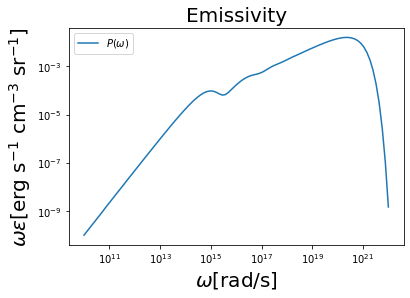

In [8]:
number=100
omega=np.logspace(log_omega_min,log_omega_max,number)


P=np.zeros(number)

for i in range(number):
    P[i]=P_tot(log_gamma_min,log_gamma_max,omega[i],B_0,theta)

plt.plot(omega,omega*P, label='$P(\omega)$')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title(r'Emissivity',fontsize=20)
plt.xlabel(r'$\omega$[rad/s]',fontsize=20)
plt.ylabel(r'$\omega \epsilon$[erg s$^{-1}$ cm$^{-3}$ sr$^{-1}$]',fontsize=20)
plt.show()


$$
    L=\int I dA d\Omega = \int R\epsilon  dA d\Omega = \frac{(4 \pi)^2}{3}R^3\epsilon
$$

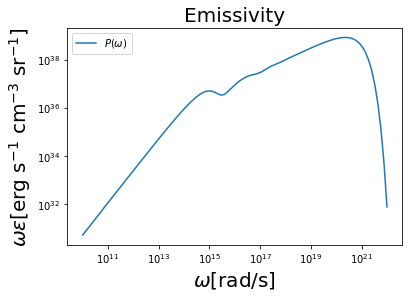

In [9]:
R_0=10**13 #cm

plt.plot(omega,omega*P*(4*np.pi)**2/3*R_0**3, label='$P(\omega)$')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title(r'Emissivity',fontsize=20)
plt.xlabel(r'$\omega$[rad/s]',fontsize=20)
plt.ylabel(r'$\omega \epsilon$[erg s$^{-1}$ cm$^{-3}$ sr$^{-1}$]',fontsize=20)
plt.show()